In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
start = '2010-01-01'
end = '2023-12-20'
stock = 'GOOG'

data = yf.download(stock , start , end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,15.615220,15.678981,15.547723,15.610239,15.610239,78541293
2010-01-05,15.620949,15.637387,15.480475,15.541497,15.541497,120638494
2010-01-06,15.588072,15.588072,15.102393,15.149715,15.149715,159744526
2010-01-07,15.178109,15.193053,14.760922,14.797037,14.797037,257533695
2010-01-08,14.744733,15.024933,14.672753,14.994298,14.994298,189680313
...,...,...,...,...,...,...
2023-12-13,134.544998,134.779999,132.949997,133.970001,133.970001,25414500
2023-12-14,134.770004,135.035004,131.059998,133.199997,133.199997,29619100
2023-12-15,132.919998,134.830002,132.630005,133.839996,133.839996,58569400


In [5]:
data.reset_index(inplace=True)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,15.615220,15.678981,15.547723,15.610239,15.610239,78541293
1,2010-01-05,15.620949,15.637387,15.480475,15.541497,15.541497,120638494
2,2010-01-06,15.588072,15.588072,15.102393,15.149715,15.149715,159744526
3,2010-01-07,15.178109,15.193053,14.760922,14.797037,14.797037,257533695
4,2010-01-08,14.744733,15.024933,14.672753,14.994298,14.994298,189680313
...,...,...,...,...,...,...,...
3510,2023-12-13,134.544998,134.779999,132.949997,133.970001,133.970001,25414500
3511,2023-12-14,134.770004,135.035004,131.059998,133.199997,133.199997,29619100
3512,2023-12-15,132.919998,134.830002,132.630005,133.839996,133.839996,58569400
3513,2023-12-18,133.860001,138.380005,133.770004,137.190002,137.190002,25699800


In [6]:
ma_200days = data.Close.rolling(200).mean()
ma_100days = data.Close.rolling(100).mean()

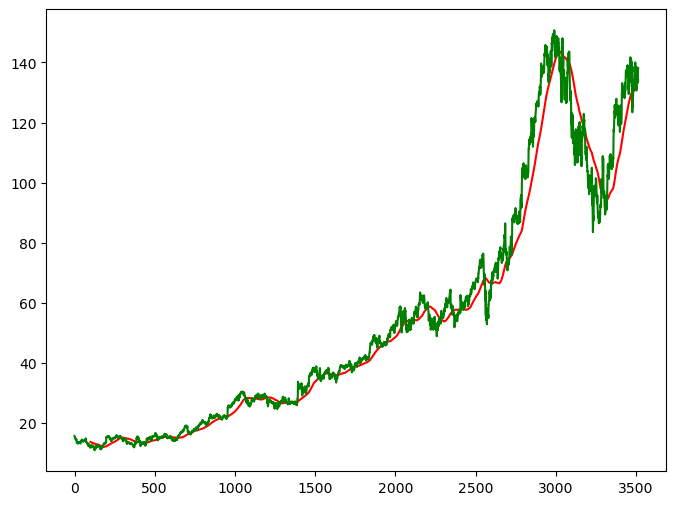

In [7]:
plt.figure(figsize=(8,6))
plt.plot(ma_100days,'r')
plt.plot(data.Close , 'g')
plt.show()

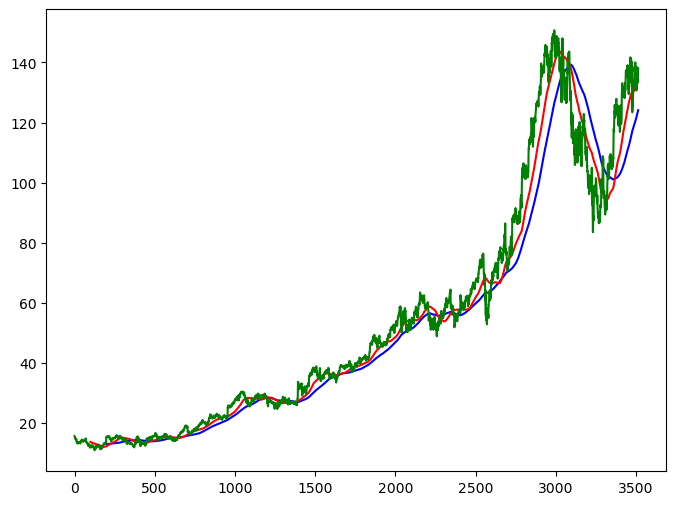

In [8]:
plt.figure(figsize=(8,6))
plt.plot(ma_200days,'b')
plt.plot(ma_100days,'r')
plt.plot(data.Close , 'g')
plt.show()

In [9]:
data.dropna(inplace=True)

In [10]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80) :])

In [11]:
data_train.shape[0]

2812

In [12]:
data_test.shape[0]

703

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [14]:
data_train_scale = scaler.fit_transform(data_train)

In [15]:
x=[]
y=[]

for i in range(44, data_train_scale.shape[0]):
  x.append(data_train_scale[i-44:i])
  y.append(data_train_scale[i,0])

In [16]:
x,y = np.array(x),np.array(y)

In [17]:
from keras.layers import Dense , Dropout , LSTM
from keras.models import Sequential

In [18]:
model = Sequential()

model.add(LSTM(units=50,activation='relu', return_sequences=True , dropout = 0.2 , input_shape = ((x.shape[1],1))))

model.add(LSTM(units=60,activation='relu', return_sequences=True , dropout = 0.3 ))

model.add(LSTM(units=80,activation='relu', return_sequences=True , dropout = 0.4 ))

model.add(LSTM(units=120,activation='relu', dropout = 0.5 ))

model.add(Dense(units=1))

In [19]:
model.compile(optimizer = 'adam' , loss = 'mean_squared_error')

In [20]:
model.fit(x,y, epochs = 50 , batch_size = 32 , verbose = 1)

Epoch 1/50

87/87 [==============================] - 23s 121ms/step - loss: 0.0137
Epoch 2/50
87/87 [==============================] - 11s 123ms/step - loss: 0.0017
Epoch 3/50
87/87 [==============================] - 11s 123ms/step - loss: 0.0013
Epoch 4/50
87/87 [==============================] - 11s 122ms/step - loss: 0.0013
Epoch 5/50
87/87 [==============================] - 10s 120ms/step - loss: 0.0011
Epoch 6/50
87/87 [==============================] - 10s 120ms/step - loss: 0.0011
Epoch 7/50
87/87 [==============================] - 10s 119ms/step - loss: 9.7493e-04
Epoch 8/50
87/87 [==============================] - 11s 123ms/step - loss: 0.0010
Epoch 9/50
87/87 [==============================] - 11s 121ms/step - loss: 0.0010
Epoch 10/50
87/87 [==============================] - 11s 121ms/step - loss: 0.0011
Epoch 11/50
87/87 [==============================] - 11s 122ms/step - loss: 9.8225e-04
Epoch 12/50
87/87 [==============================] - 11s 121ms/step - loss: 8.5704e-04


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 44, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 44, 60)            26640     
                                                                 
 lstm_2 (LSTM)               (None, 44, 80)            45120     
                                                                 
 lstm_3 (LSTM)               (None, 120)               96480     
                                                                 
 dense (Dense)               (None, 1)                 121       
                                                                 
Total params: 178761 (698.29 KB)
Trainable params: 178761 (698.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
pas_44days = data_train.tail(44)

In [23]:
data_test = pd.concat([pas_44days , data_test] , ignore_index = True)

In [24]:
data_test_scale = scaler.fit_transform(data_test)

In [25]:
x=[]
y=[]

for i in range(44, data_test_scale.shape[0]):
  x.append(data_test_scale[i-44:i])
  y.append(data_test_scale[i,0])

x,y=np.array(x) , np.array(y)

In [26]:
y_predict = model.predict(x)

22/22 [==============================] - 2s 46ms/step


In [27]:
scale = 1/scaler.scale_

In [28]:
y_predict = y_predict*scale

In [29]:
y=y*scale

<function matplotlib.pyplot.show(close=None, block=None)>

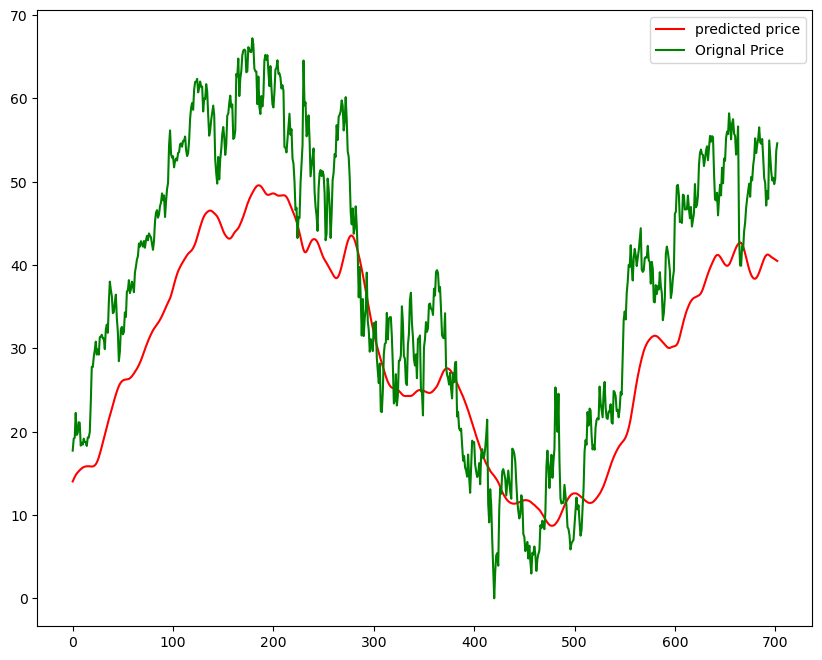

In [30]:
plt.figure(figsize = (10,8))
plt.plot(y_predict , 'r', label='predicted price')
plt.plot(y , 'g' , label = 'Orignal Price')
xlabel = 'Time'
ylabel = 'Price'
plt.legend()
plt.show

In [31]:
model.save('Stock Market Prediction 44 Moving Average.keras')